# College Scorecard Exploratatory Analysis

This is a bit of an exploration of the college scorecard analysis. I'm very curious to see what I can puzzle out.  Some ideas I'm working on in my head:

This is data for schools, not individual students, so many of the questions I had aren't tractable here.

In [1]:
# Start with some imports and setups
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [61]:
connection = sqlite3.connect('data/database.sqlite')
train_df = pd.read_sql('select INSTNM, UNITID, STABBR, HIGHDEG, '+ 
                       'PREDDEG, CONTROL, ' +
                       'HBCU, PBI, ANNHI, TRIBAL, AANAPII, ' + 
                       'HSI, NANTI, RELAFFIL, '+
                       'DISTANCEONLY, TUITFTE, INEXPFTE, ' + 
                       'cast(AVGFACSAL as int) AVGFACSAL, '+ 
                       'cast(ADM_RATE as int) ADM_RATE, ' + 
                       'cast(ADM_RATE_ALL as int) ADM_RATE_ALL, '+ 
                       'cast(SATVR25 as int) SATVR25, ' + 
                       'cast(SATVR75 as int) SATVR75, '+
                       'cast(SATMT25 as int) SATMT25, ' + 
                       'cast(SATMT75 as int) SATMT75, ' + 
                       'cast(SATWR25 as int) SATWR25, ' + 
                       'cast(SATWR75 as int) SATWR75, ' + 
                       'cast(ACTEN25 as int) ACTEN25, ' + 
                       'cast(ACTEN75 as int) ACTEN75, ' + 
                       'cast(ACTWR25 as int) ACTWR25, ' +
                       'cast(ACTWR75 as int) ACTWR75, ' +
                       'cast(ACTMT25 as int) ACTMT25, ' +
                       'cast(ACTMT75 as int) ACTMT75, ' + 
                       'cast(ACTCM25 as int) ACTCM25, ' +
                       'cast(ACTCM75 as int) ACTCM75, ' + 
                       'cast(COSTT4_A as int) COSTT4_A, ' +
                       'cast(COSTT4_P as int) COSTT4_P, ' + 
                       'cast(TUITIONFEE_IN as int) TUITIONFEE_IN, ' +
                       'cast(TUITIONFEE_OUT as int) TUITIONFEE_OUT, '+
                       'cast(TUITIONFEE_PROG as int) TUITIONFEE_PROG, ' +
                       'cast(NPT41_PUB as int) NPT41_PUB, ' + 
                       'cast(NPT42_PUB as int) NPT42_PUB, ' +
                       'cast(NPT43_PUB as int) NPT43_PUB, ' +
                       'cast(NPT44_PUB as int) NPT44_PUB, ' + 
                       'cast(NPT45_PUB as int) NPT45_PUB, ' + 
                       'cast(NPT41_PRIV as int) NPT41_PRIV, ' +
                       'cast(NPT42_PRIV as int) NPT42_PRIV, ' + 
                       'cast(NPT43_PRIV as int) NPT43_PRIV, ' +
                       'cast(NPT44_PRIV as int) NPT44_PRIV, ' +
                       'cast(NPT45_PRIV as int) NPT45_PRIV, ' +
                       'cast(UGDS as int) UGDS, ' +
                       'cast(UGDS_WHITE as int) UGDS_WHITE, ' + 
                       'cast(UGDS_BLACK as int) UGDS_BLACK, ' +
                       'cast(UGDS_HISP as int) UGDS_HISP, ' + 
                       'cast(UGDS_ASIAN as int) UGDS_ASIAN, ' +
                       'cast(UGDS_AIAN as int) UGDS_AIAN, ' + 
                       'cast(UGDS_NHPI as int) UGDS_NHPI, ' +
                       'cast(UGDS_2MOR as int) UGDS_2MOR, ' + 
                       'cast(UGDS_NRA as int) UGDS_NRA, ' +
                       'cast(UGDS_UNKN as int) UGDS_UNKN, ' + 
                       'cast(INC_PCT_LO as int) INC_PCT_LO, ' + 
                       'cast(INC_PCT_M1 as int) INC_PCT_M1, ' +
                       'cast(INC_PCT_M2 as int) INC_PCT_M2, ' + 
                       'cast(INC_PCT_H1 as int) INC_PCT_H1, ' +
                       'cast(INC_PCT_H2 as int) INC_PCT_H2, ' +
                       'cast(PAR_ED_PCT_1STGEN as int) PAR_ED_PCT_1STGEN, ' + 
                       'cast(APPL_SCH_PCT_GE2 as int) APPL_SCH_PCT_GE2, ' +
                       'cast(PCTPELL as int) PCTPELL, ' + 
                       'cast(DEBT_MDN as int) DEBT_MDN, ' +
                       'cast(LO_INC_DEBT_MDN as int) LO_INC_DEBT_MDN, ' + 
                       'cast(MD_INC_DEBT_MDN as int) MD_INC_DEBT_MDN, ' +
                       'cast(HI_INC_DEBT_MDN as int) HI_INC_DEBT_MDN, ' + 
                       'cast(FEMALE_DEBT_MDN as int) FEMALE_DEBT_MDN, '+
                       'cast(MALE_DEBT_MDN as int) MALE_DEBT_MDN, ' + 
                       'cast(FIRSTGEN_DEBT_MDN as int) FIRSTGEN_DEBT_MDN, ' +
                       'cast(NOTFIRSTGEN_DEBT_MDN as int) NOTFIRSTGEN_DEBT_MDN, ' + 
                       'cast(MN_EARN_WNE_P6 as int) MN_EARN_WNE_P6, ' +
                       'cast(MN_EARN_WNE_P10 as int) MN_EARN_WNE_P10, ' + 
                       'cast(GT_25K_P6 as int) GT_25K_P6, ' +
                       'cast(GT_25K_P10 as int) GT_25K_P10, ' + 
                       'cast(CDR3 as int) CDR3, ' +
                       'cast(RPY_7YR_RT as int) RPY_7YR_RT ' + 
                       'from Scorecard', connection)

In [62]:
train_df.columns

Index(['INSTNM', 'UNITID', 'STABBR', 'HIGHDEG', 'PREDDEG', 'CONTROL', 'HBCU',
       'PBI', 'ANNHI', 'TRIBAL', 'AANAPII', 'HSI', 'NANTI', 'RELAFFIL',
       'DISTANCEONLY', 'TUITFTE', 'INEXPFTE', 'AVGFACSAL', 'ADM_RATE',
       'ADM_RATE_ALL', 'SATVR25', 'SATVR75', 'SATMT25', 'SATMT75', 'SATWR25',
       'SATWR75', 'ACTEN25', 'ACTEN75', 'ACTWR25', 'ACTWR75', 'ACTMT25',
       'ACTMT75', 'ACTCM25', 'ACTCM75', 'COSTT4_A', 'COSTT4_P',
       'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'TUITIONFEE_PROG', 'NPT41_PUB',
       'NPT42_PUB', 'NPT43_PUB', 'NPT44_PUB', 'NPT45_PUB', 'NPT41_PRIV',
       'NPT42_PRIV', 'NPT43_PRIV', 'NPT44_PRIV', 'NPT45_PRIV', 'UGDS',
       'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN',
       'UGDS_NHPI', 'UGDS_2MOR', 'UGDS_NRA', 'UGDS_UNKN', 'INC_PCT_LO',
       'INC_PCT_M1', 'INC_PCT_M2', 'INC_PCT_H1', 'INC_PCT_H2',
       'PAR_ED_PCT_1STGEN', 'APPL_SCH_PCT_GE2', 'PCTPELL', 'DEBT_MDN',
       'LO_INC_DEBT_MDN', 'MD_INC_DEBT_MDN', 'HI_INC_DEBT_MDN',
 

### Since we cast the columns to int as we read in, we don't have to worry about Privacy Suppressed entries.

Let's look at some chartporn.  

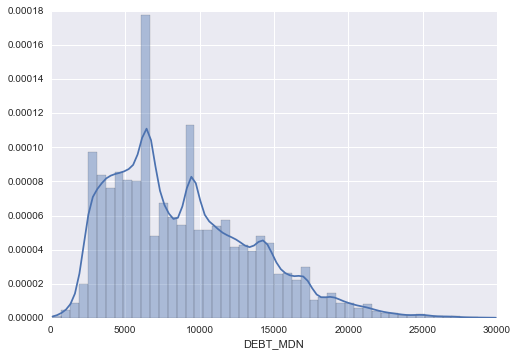

In [65]:
# What does the distribution of Debt look like?
sns.distplot(train_df[(train_df['DEBT_MDN'] > 0) &
                      (train_df['DEBT_MDN'] < 30000)].DEBT_MDN)

#### It looks like the distribution is pretty broad.  That's interesting in it's own right. What happens if we  split in a couple different ways?

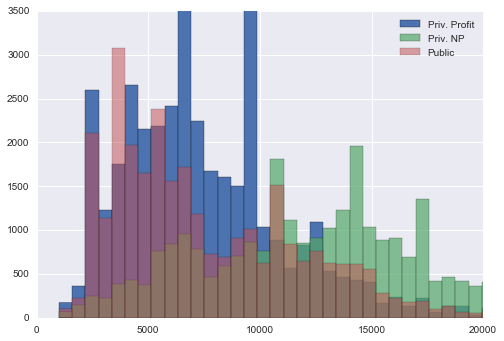

In [116]:
# average survived passengers by age
bins = np.linspace(1000, 30000, 50)
public_debt = train_df[train_df['CONTROL'] == 'Public']['DEBT_MDN']
private_non_dept = train_df[train_df['CONTROL'] == 'Private nonprofit']['DEBT_MDN']
private_profit = train_df[train_df['CONTROL'] == 'Private for-profit']['DEBT_MDN']

plt.hist(private_profit, bins, alpha=1.0, label='Priv. Profit')
plt.hist(private_non_dept, bins, alpha=0.7, label='Priv. NP')
plt.hist(public_debt, bins, alpha=0.5, label='Public')
plt.xlim(0, 20000)
plt.ylim(0, 3500)
plt.legend()
plt.show()

So it looks like your best bet is to go to public school if you want to minimize your debt. Clearly, that's not the main motivator.  Private NP also have a much broader distribution -- more likely to owe quite a lot.

#### How are debts for each of the genders differ?

In [139]:
keep = (train_df['MALE_DEBT_MDN'].isnull() == 0) & (train_df['FEMALE_DEBT_MDN'].isnull() == 0) &(train_df['MALE_DEBT_MDN'] > 0) & (train_df['FEMALE_DEBT_MDN'] > 0)

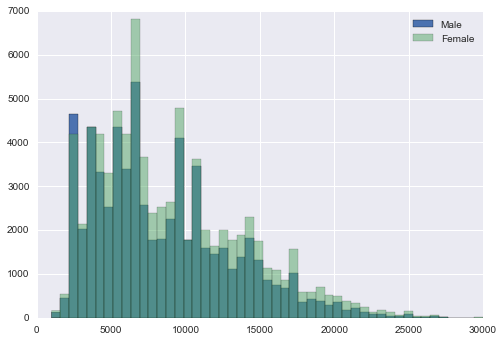

In [145]:
bins = np.linspace(1000, 30000, 50)

plt.hist(train_df['MALE_DEBT_MDN'], bins, alpha=1.0, label='Male')
plt.hist(train_df['FEMALE_DEBT_MDN'], bins, alpha=0.5, label='Female')
plt.xlim(0, 30000)
plt.legend()
plt.show()

In [147]:
train_df[train_df['CONTROL']=="Public"]

,INSTNM,UNITID,STABBR,HIGHDEG,PREDDEG,CONTROL,HBCU,PBI,ANNHI,TRIBAL,...,FEMALE_DEBT_MDN,MALE_DEBT_MDN,FIRSTGEN_DEBT_MDN,NOTFIRSTGEN_DEBT_MDN,MN_EARN_WNE_P6,MN_EARN_WNE_P10,GT_25K_P6,GT_25K_P10,CDR3,RPY_7YR_RT
0,COMMUNITY COLLEGE OF THE AIR FORCE,100636,AL,Associate degree,Predominantly associate's-degree granting,Public,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALABAMA A & M UNIVERSITY,100654,AL,Graduate degree,Predominantly bachelor's-degree granting,Public,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,UNIVERSITY OF ALABAMA AT BIRMINGHAM,100663,AL,Graduate degree,Predominantly bachelor's-degree granting,Public,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALABAMA AVIATION AND TECHNICAL COLLEGE,100672,AL,Associate degree,Predominantly certificate-degree granting,Public,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,UNIVERSITY OF ALABAMA IN HUNTSVILLE,100706,AL,Graduate degree,Predominantly bachelor's-degree granting,Public,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ALABAMA STATE UNIVERSITY,100724,AL,Graduate degree,Predominantly bachelor's-degree granting,Public,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,THE UNIVERSITY OF ALABAMA,100751,AL,Graduate degree,Predominantly bachelor's-degree granting,Public,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,CENTRAL ALABAMA COMMUNITY COLLEGE,100760,AL,Associate degree,Predominantly certificate-degree granting,Public,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,ATHENS STATE COLLEGE,100812,AL,Bachelor's degree,Predominantly bachelor's-degree granting,Public,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,AUBURN UNIVERSITY AT MONTGOMERY,100830,AL,Graduate degree,Predominantly bachelor's-degree granting,Public,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
